In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid")
import scipy as sp
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from datetime import datetime

In [72]:
exec(open("../../header.py").read())

# Import data

In [73]:
X = pd.read_csv(processed_root('cervical_cancer_risks/X.csv'))
y = pd.read_csv(processed_root('cervical_cancer_risks/y.csv'))

# Fit model

In [74]:
# fit RF
rf = RandomForestClassifier(n_estimators = 500)
rf.fit(X, y['Biopsy'])

RandomForestClassifier(n_estimators=500)

# Use class

In [75]:
exec(open("../../header.py").read())

In [76]:
ice = ICE("binary", time = False)

In [77]:
ice.fit(X, rf)

In [78]:
b = pd.DataFrame({'Feature':X.columns, 
              'RF FI':rf.feature_importances_*100})\
    .round(3)

In [79]:
a = ice.feature_impact_table()\
    .drop(['Normalized Mean'], axis = 1)\
    .rename({'Normalized Absolute Mean':'Norm Mean Abs',
             'Feature Impact':'FI'}, axis = 1)\
    .round(3)\
    .merge(b, how = "inner", on = "Feature")\
    .sort_values('FI', ascending = False)

KeyError: "['Normalized Mean'] not found in axis"

In [13]:
a

,Feature,Mean,Mean Abs,St. Dev.,Norm Mean Abs,FI,RF FI
23,STDs:genital herpes,4.262,5.180,8.393,2.440,19.096,1.031
24,STDs:molluscum contagiosum,3.106,4.568,8.478,2.152,16.840,0.173
20,STDs:Hepatitis B,2.650,4.479,7.973,2.110,16.513,0.134
25,STDs:pelvic inflammatory disease,1.803,2.817,5.221,1.327,10.384,0.119
5,First sexual intercourse,0.132,0.157,1.174,0.957,7.492,12.444
19,STDs:HPV,1.112,1.968,3.564,0.926,7.249,0.198
30,Smokes (packs/year),0.015,0.085,0.482,0.513,4.015,3.430
7,Hormonal Contraceptives (years),-0.009,0.058,0.171,0.424,3.319,15.192
27,STDs:vaginal condylomatosis,0.504,0.892,1.685,0.419,3.281,0.198
9,IUD (years),0.031,0.052,0.251,0.263,2.060,3.826


# Investigate `STDs:genital herpes`

In [14]:
X['STDs:genital herpes'].value_counts()

0.000000    752
0.001328    105
1.000000      1
Name: STDs:genital herpes, dtype: int64

In [22]:
X_subset = X.loc[lambda x:x['STDs:genital herpes'] == 0]
y_pred_original = rf.predict_proba(X_subset)[:,1]

X_subset_mod = X_subset.copy()
X_subset_mod['STDs:genital herpes'] = 1
y_pred_mod = rf.predict_proba(X_subset_mod)[:,1]

print(f"The mean change in prediction is: {np.mean(y_pred_mod - y_pred_original):.2f}")

The mean change in prediction is: 0.18


**Comment**: Is it reasonable for the model to predict that genital herpes will increase cancer by 18% based on a single observation?

Probably not. But we wouldn't have noticed this weakness in the model with just the random forest feature importance.

As a result, we change min samples per leaf to 20.

# Now tune

In [23]:
rf2 = RandomForestClassifier(n_estimators = 500, min_samples_leaf = 20)
rf2.fit(X, y['Biopsy'])

RandomForestClassifier(min_samples_leaf=20, n_estimators=500)

In [24]:
ice.fit(X, rf2)

In [25]:
b = pd.DataFrame({'Feature':X.columns, 
              'RF FI':rf2.feature_importances_*100})\
    .round(3)

In [31]:
a = ice.feature_impact_table()\
    .drop(['Normalized Mean'], axis = 1)\
    .rename({'Normalized Absolute Mean':'Norm Mean Abs',
             'Feature Impact':'FI'}, axis = 1)\
    .round(3)\
    .merge(b, how = "inner", on = "Feature")\
    .assign(difference = lambda x:np.abs(x['FI'] - x['RF FI']))\
    .sort_values('difference', ascending = False)

In [32]:
a

,Feature,Mean,Mean Abs,St. Dev.,Norm Mean Abs,FI,RF FI,difference
7,Hormonal Contraceptives (years),-0.001,0.006,0.013,0.043,1.647,22.028,20.381
20,STDs:Hepatitis B,-0.902,0.902,1.066,0.425,16.140,0.594,15.546
5,First sexual intercourse,0.092,0.094,0.466,0.576,21.886,6.938,14.948
25,STDs:pelvic inflammatory disease,-0.836,0.836,0.959,0.394,14.948,0.361,14.587
24,STDs:molluscum contagiosum,-0.647,0.647,0.763,0.305,11.576,0.316,11.260
0,Age,0.000,0.001,0.002,0.015,0.555,10.182,9.627
19,STDs:HPV,-0.499,0.499,0.583,0.235,8.919,0.522,8.397
10,Num of pregnancies,0.005,0.006,0.016,0.019,0.719,8.156,7.437
23,STDs:genital herpes,-0.405,0.409,0.503,0.193,7.319,0.210,7.109
11,Number of sexual partners,0.001,0.002,0.004,0.013,0.480,6.223,5.743


In [34]:
X['STDs:Hepatitis B'].value_counts()

0.000000    752
0.001328    105
1.000000      1
Name: STDs:Hepatitis B, dtype: int64

# Investigate "direct method" for estimating propensity

In [37]:
from sklearn.linear_model import LogisticRegression

In [91]:
lr = LogisticRegression()

In [92]:
df = ice.ice_dfs['Age'].copy()
df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'orig_Age', 'obs', 'y_pred',
       'y_pred_centered', 'feature_distance', 'dy', 'dx', 'dydx', 'dydx_abs'],
      dtype='object')

In [113]:
X_df = df[['Age']]
X2_df = df[['Age', 'feature_distance']]
X3_df = df[['Age', 'y_pred']]
y1_df = df['feature_distance']
y2_df = (df['feature_distance'] == 0)*1

In [117]:
lr.fit(X_df, y2_df)

LogisticRegression()

In [95]:
accuracy = np.mean(lr.predict(X_df) == y2_df)

print(f"Accuracy of logistic reg in distinguishing original observation from phantom observations: {accuracy:.2f}")

Accuracy of logistic reg in distinguishing original observation from phantom observations: 0.98


In [96]:
brier = np.mean((lr.predict_proba(X_df)[:,1] - y2_df)**2)
print(f"Brier: {brier:.5f}")

Brier: 0.02208


In [118]:
pd.DataFrame({'true':y2_df, 'pred_prob':lr.predict_proba(X_df)[:,1]})\
    .groupby('true')\
    .agg(pred_prob_mean = ('pred_prob', 'mean'),
         pred_prob_max = ('pred_prob', 'max'),
         pred_prob_min = ('pred_prob', 'min'))\
    .reset_index()

,true,pred_prob_mean,pred_prob_max,pred_prob_min
0,0,0.022555,0.054876,0.00159
1,1,0.030134,0.054876,0.00159


In [119]:
np.corrcoef(lr.predict_proba(X_df)[:,1], y1_df)

array([[ 1.        , -0.53078369],
       [-0.53078369,  1.        ]])

In [56]:
from sklearn.linear_model import LinearRegression
lr2 = LinearRegression()

In [67]:
lr2.fit(X_df, y1_df)

LinearRegression()

In [70]:
print(f"Brier: {np.mean((lr2.predict(X_df) - y1_df)**2):.2f}")
print(f"R^2: {lr2.score(X_df, y1_df):.4f}")

Brier: 75.10
R^2: 0.5868


In [122]:
lr2 = LogisticRegression(class_weight = 'balanced')

In [123]:
lr2.fit(X_df, y2_df)

LogisticRegression(class_weight='balanced')

In [124]:
pd.DataFrame({'true':y2_df, 'pred_prob':lr2.predict_proba(X_df)[:,1]})\
    .groupby('true')\
    .agg(pred_prob_mean = ('pred_prob', 'mean'),
         pred_prob_max = ('pred_prob', 'max'),
         pred_prob_min = ('pred_prob', 'min'))\
    .reset_index()

,true,pred_prob_mean,pred_prob_max,pred_prob_min
0,0,0.438251,0.753507,0.034843
1,1,0.561749,0.753507,0.034843


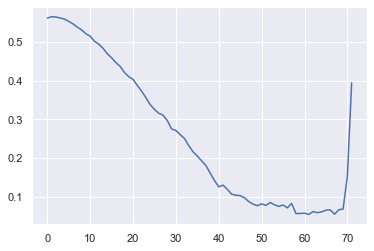

In [130]:
a = pd.DataFrame({'feature_distance':df['feature_distance'], 'pred_prob':lr2.predict_proba(X_df)[:,1]})\
    .groupby('feature_distance')\
    .agg(pred_prob_mean = ('pred_prob', 'mean'))\
    .reset_index()

fig, ax = plt.subplots()
ax.plot('feature_distance', 'pred_prob_mean', data = a)

In [132]:
np.corrcoef(a, rowvar = False)

array([[ 1.        , -0.91763638],
       [-0.91763638,  1.        ]])